# Week 8 exercise 2: global maps

Questions?
contact: pengfei.liu@eas.gatech.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs

# if you get errors to import these packages , you will need to install them in Anaconda
# in anaconda command prompt (windows) or terminal (mac/linux) 
# Activate your environment, then type:
# conda install cartopy xarray netcdf4 

In [2]:
# Download the most recent NCEP renalysis monthly data from the link below:
# https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surface.html
# read NCEP reanalysis monthly data (in netcdf format)
# if you get an error in this step, most likely the netcdf4 package is missing in your environment
# to install netcdf4 package, type "conda install netcdf4" in command line
ds=xr.open_dataset('./air.mon.mean.nc')
# show a summary of the dataset
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 901)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-01-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

## Mini project #3: 2-D plot on a map

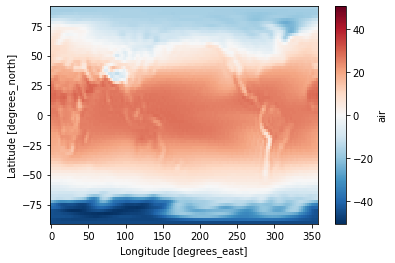

In [3]:
# extract surface air temperature data for 1948 to 2022
TMP_NCEP=ds.air.sel(time=slice("1948-01-01","2022-12-01"))
# make a simple plot for climatological mean 
TMP_NCEP_mean=TMP_NCEP.mean(dim='time')
TMP_NCEP_mean.plot()
plt.show()

In [4]:
# Here are more examples of selecting data using xarray
# Select March data for every year
TMP_NCEP_Mar=TMP_NCEP.sel(time=TMP_NCEP['time.month']==3)

# calculate climatological mean for each month 
TMP_NCEP_month=TMP_NCEP.groupby('time.month').mean('time')

In [5]:
# X=np.append(TMP_NCEP_mean.lon.values,360)
# Y=np.append(TMP_NCEP_mean.lat.values,-90)
X=TMP_NCEP_mean.lon.values
Y=TMP_NCEP_mean.lat.values
Z=TMP_NCEP_mean.values

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolormesh_levels.html
# We usually specify a pcolormesh by defining the edge of quadrilaterals and the value of the quadrilateral. 
# Note that here Xb and Yb each have one extra element than Z in the respective dimension.
 
# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)
np.size(Xb)

145

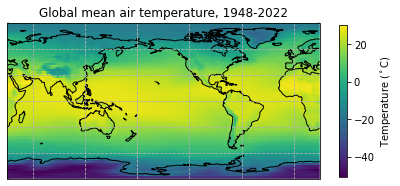

In [9]:
# make it nicer
fig=plt.figure(figsize=(7, 4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-150))
cf=ax.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle='--')
fig.colorbar(cf, ax=ax,shrink=0.7, label='Temperature ($^\circ$C)')
ax.set_title('Global mean air temperature, 1948-2022')

fn='Fig_global_mean3'
plt.savefig(fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig(fn+'.png',bbox_inches="tight",dpi=300)
plt.show()

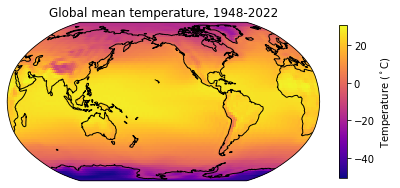

In [10]:
# Let's try other projections
# https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
fig=plt.figure(figsize=(7, 4))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-150))
cf=ax.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree(),cmap='plasma',rasterized=True,shading='flat')
ax.coastlines()
plt.colorbar(cf, ax=ax,shrink=0.7, label='Temperature ($^\circ$C)')

ax.set_title('Global mean temperature, 1948-2022')

fn='Fig_global_mean_RobinsonProj'
plt.savefig(fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig(fn+'.png',bbox_inches="tight",dpi=300)
plt.show()

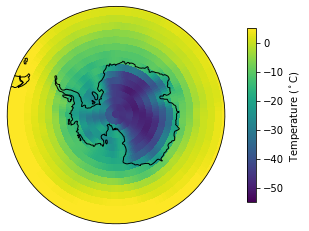

In [12]:
# southpole stereo plot
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

cf=ax.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree(),cmap='viridis',vmin=-55,vmax=5,rasterized=True)
fig.colorbar(cf, ax=ax,shrink=0.8, label='Temperature ($^\circ$C)')
ax.coastlines()

fn='Fig_global_mean_SP'
plt.savefig(fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig(fn+'.png',bbox_inches="tight",dpi=300)
plt.show()